In [18]:
import pandas as pd
import seaborn as sns
import ast
import collections
import matplotlib.pyplot as plt

In [2]:
movies_df = pd.read_csv('dataframe.csv')

In [3]:
# Be able to see all columns
pd.set_option('display.max_columns', 500)

In [4]:
# Create a new dataframe excluding movies without a Metacritic score
movies_meta_df = movies_df[movies_df['metacritic_score'] != 'No Metacritic score']

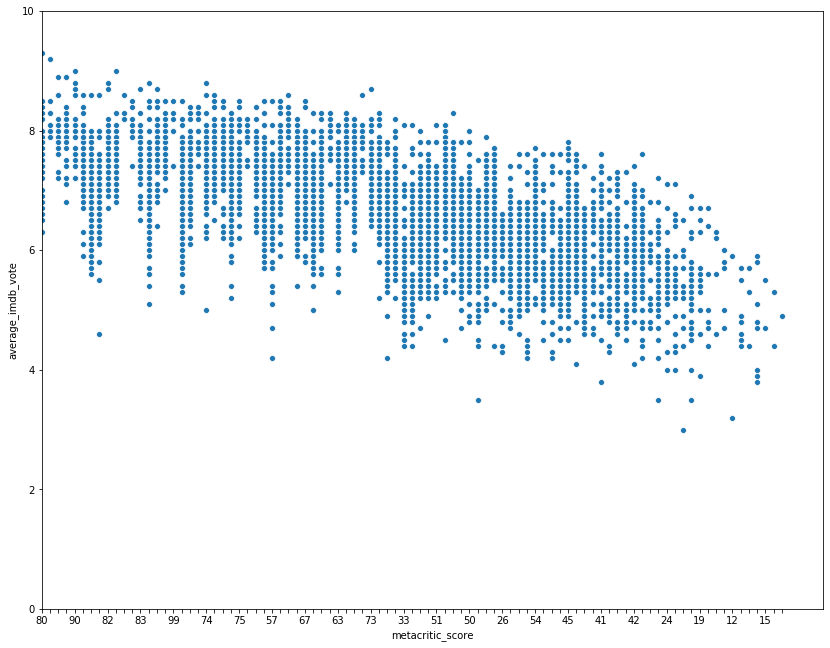

In [50]:
# Plot critical score vs. popular score
f, ax = plt.subplots(figsize=(14, 11))

ax.set_xlim(0,95)
ax.set_ylim(0,10)

splot = sns.scatterplot(x = movies_meta_df['metacritic_score'], y = movies_meta_df['average_imdb_vote'])

every_nth = 4
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

plt.show()

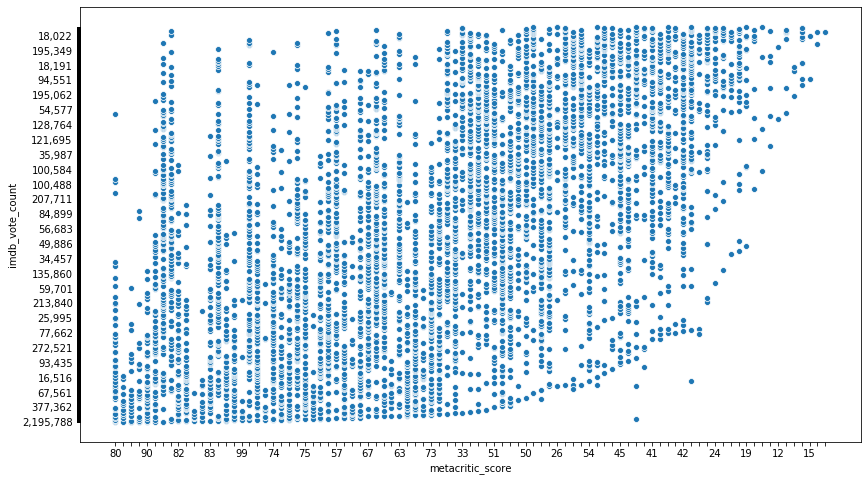

In [61]:
# Plot popular vote count (a potential measure of popularity) vs. critical score
f, ax = plt.subplots(figsize=(14, 8))

splot = sns.scatterplot(x = movies_meta_df['metacritic_score'], y = movies_meta_df['imdb_vote_count'])

every_nth = 4
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

every_nth = 200
for n, label in enumerate(ax.yaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

plt.show()

In [65]:
# Plot popular vote count vs. popular score
f, ax = plt.subplots(figsize=(14, 8))

splot = sns.scatterplot(x = movies_df['imdb_vote_count'], y = movies_df['average_imdb_vote'])

every_nth = 300
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)


plt.show()

KeyboardInterrupt: 

In [19]:
# Create a new dataframe for surfacing emerging directors
movies_director_df = movies_df

In [20]:
# Create an array of just the 4 characters of the string representing release date
year = []
for x in movies_director_df['release_date']:
    year.append(int(x[:4]))

In [21]:
# Create a new column for year
movies_director_df['year'] = year

In [22]:
# Narrow down current Emerging Directors by looking for movies made after 2000, with a budget of less than $10MM
movies_director_df = movies_director_df[movies_director_df['year'] >= 2000]
movies_director_df = movies_director_df[movies_director_df['budget'] < 10000000]
movies_director_df = movies_director_df[movies_director_df['budget'] != 0]

In [23]:
# Create a collection of directors in this subset of movies, along with a counter of appearances
director_mod = []
for x in movies_director_df['director']:
    try:
        x = ast.literal_eval(x)
        for i in x:
            director_mod.append(i)
    except (SyntaxError, ValueError):
        director_mod.append(x)
director_mod_dict = collections.Counter(director_mod).most_common()

In [25]:
# Create a list of Emerging Directors with 2-3 appearances
emerging_directors = []
for k, v in director_mod_dict:
    if v > 2 and v < 4:
        emerging_directors.append(k)

In [24]:
# Verify functionality
x = 0
for k, v in director_mod_dict:
    if v > 2 and v < 4:
        print(k ,v)
        x += 1
print(x)

John Carney 3
Michael Haneke 3
Pedro Almodóvar 3
James Wan 3
Jaume Balagueró 3
Daniel Alfredson 3
Lauren Montgomery 3
François Ozon 3
Kevin Smith 3
Christopher Landon 3
Gurinder Chadha 3
Greg McLean 3
Xavier Gens 3
13


In [27]:
# Create a new dataframe for only the movies directed by the Emerging Directors
movies_emerging_directors_df = movies_director_df[movies_director_df['director'].isin(emerging_directors)]

In [28]:
# Remove movies without a worldwide_gross figure
movies_emerging_directors_df = movies_emerging_directors_df[movies_emerging_directors_df['worldwide_gross'] != '–']

In [29]:
# Remove movies with an invalid budget
movies_emerging_directors_df = movies_emerging_directors_df[movies_emerging_directors_df['budget'] != 1]

In [31]:
# Convert worldwide_gross data into an int
movies_emerging_directors_df['worldwide_gross'] = movies_emerging_directors_df['worldwide_gross'].str.replace(',','').str.replace('$','').astype(int)

In [32]:
# Create a new column for RoI
movies_emerging_directors_df['return_on_investment'] =(movies_emerging_directors_df['worldwide_gross'] - movies_emerging_directors_df['budget']) / (movies_emerging_directors_df['budget'])

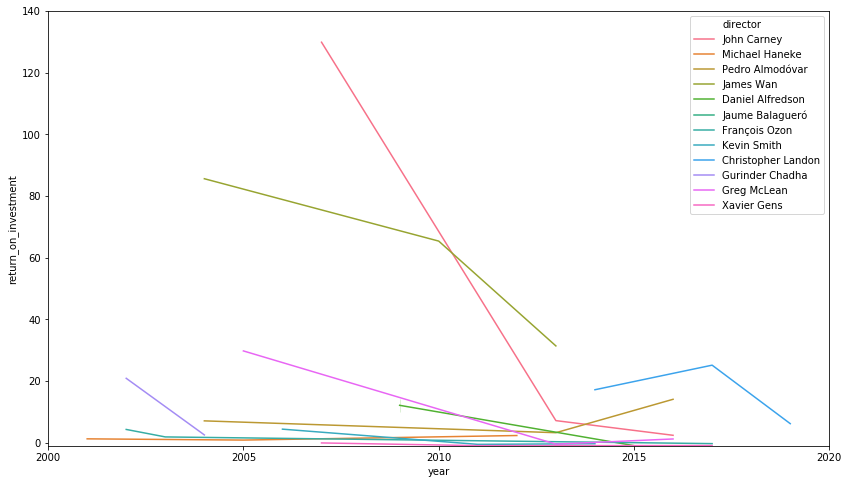

In [55]:
# Plot Emerging Directors with their RoI. Anything above 1 has "broken even"
f, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim(2000,2020)
ax.set_ylim(-1,140)
sns.lineplot(x = movies_emerging_directors_df['year'], y = movies_emerging_directors_df['return_on_investment'], hue=movies_emerging_directors_df['director'])

plt.locator_params(axis='x', nbins=6)

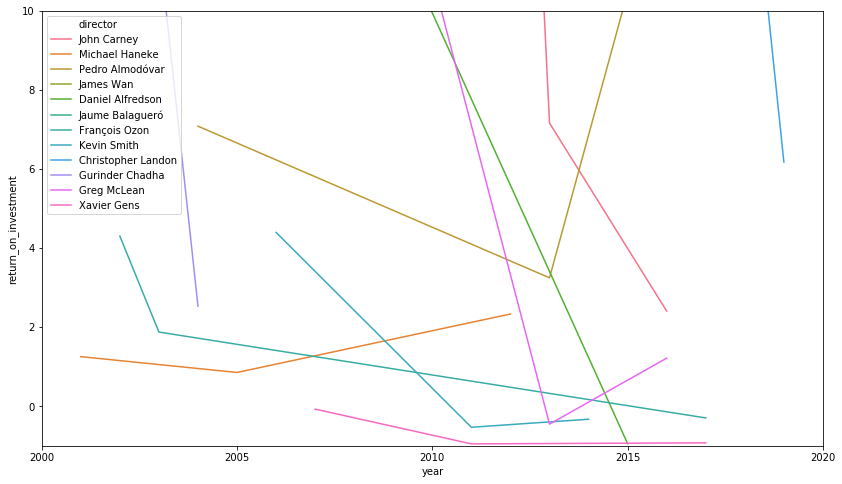

In [54]:
# Detailed view of Emerging Directors with their RoI, emphasizing anything above 1 has "broken even". 
f, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim(2000,2020)
ax.set_ylim(-1,10)

sns.lineplot(x = movies_emerging_directors_df['year'].astype(int), y = movies_emerging_directors_df['return_on_investment'], hue=movies_emerging_directors_df['director'])
plt.locator_params(axis='x', nbins=6)

In [79]:
# Remove movies without a Metacritic score
movies_emerging_directors_meta_df = movies_emerging_directors_df[movies_emerging_directors_df['metacritic_score'] != 'No Metacritic score']

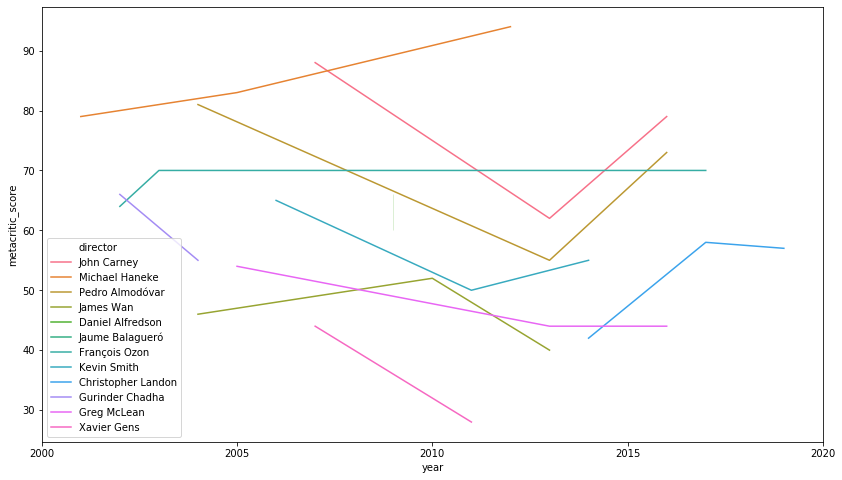

In [80]:
# Emerging Directors and their Metacritic scores
f, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim(2000,2020)

sns.lineplot(x = movies_emerging_directors_meta_df['year'], y = movies_emerging_directors_meta_df['metacritic_score'].astype(int), hue=movies_emerging_directors_meta_df['director'])
plt.locator_params(axis='x', nbins=6)

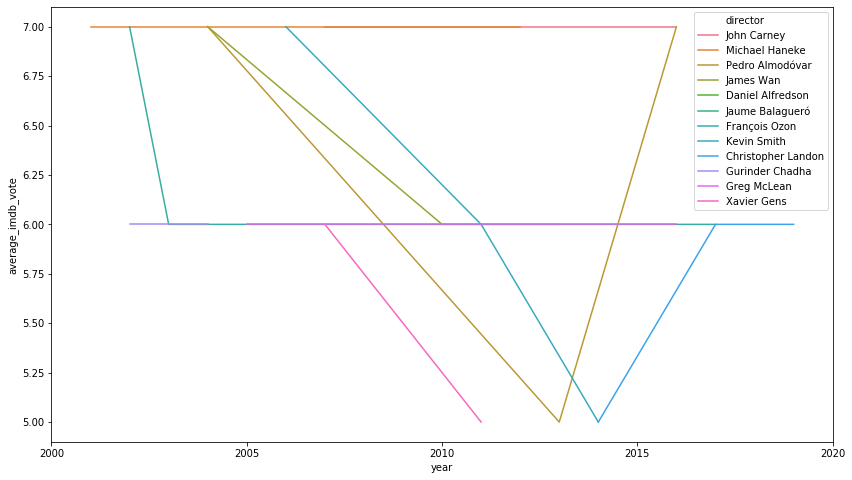

In [81]:
# Emerging Directors and their IMDb scores
f, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim(2000,2020)

sns.lineplot(x = movies_emerging_directors_df['year'], y = movies_emerging_directors_df['average_imdb_vote'].astype(int), hue=movies_emerging_directors_meta_df['director'])
plt.locator_params(axis='x', nbins=6)

In [ ]:
############# 

In [ ]:
#Andrew's Visualization's

In [ ]:
import ast
#I am importing this tool in order to change my string columns to integers 

In [ ]:
dataframe = pd.read_csv('dataframe.csv')
#Load the csv we created throught webscraping and using themovieDB API as a data frame

In [ ]:
#created a seprect data frame to keep the original intact 
dataframe_profit = dataframe

In [ ]:
#These next few lines of code I am cleaning the data to get rid of 0's and error values
buddy = dataframe_profit[dataframe_profit['budget'] != 0]
Buddy = buddy[buddy['worldwide_gross'] != '–'].drop(index=0)

#now im going to turn Bud[worldwide_gross] into an integer and remove ',' and '$''
Buddy['worldwide_gross'] = Buddy['worldwide_gross'].str.replace(',','').str.replace('$','').astype(int)
#after converting the string to integers now i am able to clean the dataframe Buddy for column['budget'] 
Buddy = Buddy[Buddy['budget'] >= 20000]
#Set the variables up that we are going to preform the return_on_investment calculation on 
Clean_wwg = Buddy['worldwide_gross']
Clean_bud = Buddy['budget']

In [ ]:
# this is ROI calculation (rev - cost)/cost
Buddy['return_on_investment'] =(((Clean_wwg-Clean_bud)/Clean_bud) * 100)

In [ ]:
#here I am creating a column to islolate the year from release_date and coarse it into an integer 
year = []
for x in Buddy['release_date']:
    year.append(int(x[:4]))
Buddy['year'] = year

In [ ]:
#this code cleans up the data by removing rows with release dates bellow 1990 uddy = Buddy[Buddy['year'] >= 1990] to account for inflation 
 
Buddy = Buddy[Buddy['year'] >= 1990]

In [ ]:
#now that i created return on investment and cleaned up my data
#I have to unpack the genre column to graph the ROI against each genre
drama = []
#this is a for loop that i made to get all genres into a list 
for x in Buddy['genres']:
    x = ast.literal_eval(x)
    for i in x:
        drama.append(i)

In [ ]:
#this function outputs all of the unique values in the list drama 
def unique(list1): 
    x = np.array(list1) 
    print(np.unique(x))

In [ ]:
unique(drama)

In [ ]:
#I created a DF for each genre 
Bud_com = Buddy[Buddy['genres'].str.contains('Comedy')]
Bud_act = Buddy[Buddy['genres'].str.contains('Action')]
Bud_adv = Buddy[Buddy['genres'].str.contains('Adventure')]
Bud_ani = Buddy[Buddy['genres'].str.contains('Animation')]
Bud_cri = Buddy[Buddy['genres'].str.contains('Crime')]
Bud_dra = Buddy[Buddy['genres'].str.contains('Drama')]
Bud_fam = Buddy[Buddy['genres'].str.contains('Family')]
Bud_fan = Buddy[Buddy['genres'].str.contains('Fantasy')]
Bud_his = Buddy[Buddy['genres'].str.contains('History')]
Bud_hor = Buddy[Buddy['genres'].str.contains('Horror')]
Bud_mus = Buddy[Buddy['genres'].str.contains('Music')]
Bud_mys = Buddy[Buddy['genres'].str.contains('Mystery')]
Bud_rom = Buddy[Buddy['genres'].str.contains('Romance')]
Bud_sci = Buddy[Buddy['genres'].str.contains('Science Fiction')]
Bud_thr = Buddy[Buddy['genres'].str.contains('Thriller')]
Bud_war = Buddy[Buddy['genres'].str.contains('War')]
Bud_wes = Buddy[Buddy['genres'].str.contains('Western')]

In [ ]:
#Here changed all of the values in the genres coloumn to match the dataframe its in 
Bud_com['genres'] = Bud_com['genres'].apply(lambda x: 'Comedy')
Bud_act['genres']= Bud_act['genres'].apply(lambda x: 'Action')
Bud_adv['genres'] = Bud_adv['genres'].apply(lambda x: 'Adventure')
Bud_ani['genres'] = Bud_ani['genres'].apply(lambda x: 'Animation')
Bud_cri['genres'] = Bud_cri['genres'].apply(lambda x: 'Crime')
Bud_dra['genres'] = Bud_dra['genres'].apply(lambda x: 'Drama')
Bud_fam['genres'] = Bud_fam['genres'].apply(lambda x: 'Family')
Bud_fan['genres'] = Bud_fan['genres'].apply(lambda x: 'Fantasy')
Bud_his['genres'] = Bud_his['genres'].apply(lambda x: 'History')
Bud_hor['genres'] = Bud_hor['genres'].apply(lambda x: 'Horror')
Bud_mus['genres'] = Bud_mus['genres'].apply(lambda x: 'Music')
Bud_mys['genres'] = Bud_mys['genres'].apply(lambda x: 'Mystery')
Bud_rom['genres'] = Bud_rom['genres'].apply(lambda x: 'Romance')
Bud_sci['genres'] = Bud_sci['genres'].apply(lambda x: 'Science Fiction')
Bud_thr['genres'] = Bud_thr['genres'].apply(lambda x: 'Thriller')
Bud_war['genres'] = Bud_war['genres'].apply(lambda x: 'War')
Bud_wes['genres'] = Bud_wes['genres'].apply(lambda x: 'western')

In [ ]:
Bud_hor['return_on_investment'].round().describe()
#using .describe showed me the outliers in the data 
Bud_hor.loc[4328]
#using .loc i was able to pin point a specific outlier and drop the rows that had errors in it  
# i created the boolian if budget >= 2000 keep and if budget != 0


In [ ]:
#i used pd.concat to put all of the dataframes into one 
sorted_Bud = (Bud_com,Bud_act,Bud_adv,Bud_ani,Bud_cri,Bud_dra,Bud_fam,Bud_fan,Bud_his,Bud_hor,Bud_mus,Bud_mys,Bud_rom,Bud_sci,Bud_thr,Bud_war,Bud_wes)
result = pd.concat(sorted_Bud)

In [ ]:
#here i am dropping the columns that don't matter and reseting the index  
result2 = result.drop(columns= 'Unnamed: 0').drop(index=1).reset_index()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#setting the style as ticks 
sns.set(style="ticks")
# Initialize the figure with an x axis from -100,800
f, ax = plt.subplots(figsize=(12, 11))
ax.set_xlim(-100,800)
#set the title 
ax.set(title = 'Most Profitable Genres')
# Plot the roi for genre with horizontal boxes
sns.boxplot(x="return_on_investment", y="genres", data=result2,
            whis="range")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Genres")
sns.despine( left=True)

In [ ]:
Buddy = Buddy.drop(columns="Unnamed: 0").reset_index().drop(columns='index')

In [ ]:
#created a new dataframe to clean popularity data to remove the strng values
Buddy_imdb = Buddy[Buddy['imdb_popularity'] != 'No popularity']

In [ ]:
#plot Roi vs popularity 
g= sns.relplot(x="return_on_investment", y='imdb_popularity', data=Buddy_imdb)

#set the x lim and y lim
g.set(xlim=(-100, 3000))
g.set(ylim=(0,3000))

#created ticks
g.ax.set_xticks([-100,500 ,1000, 1500, 2000, 2500, 3000]);
g.ax.set_yticks([500 , 1000, 1500, 2000, 2500, 3000]);

In [ ]:
#used this value to see what languages were used the most in movies
Buddy['language'].value_counts()

In [ ]:
#then i took the most popular languages and put them into a new dataframe
Buddy_lang = Buddy[Buddy['language'].str.contains('en|fr|es|it|ja|ko|cn|de|zh|da|hi|pt')]


In [ ]:
#set style as ticks
sns.set(style="ticks")

# Initialize the figure with x axis (-100, 1000)
f, ax = plt.subplots(figsize=(12, 11))
ax.set_xlim(-100,1000)
ax.set(title = 'Languages vs profit')
# Plot the ROI on language with horizontal boxes
sns.boxplot(x="return_on_investment", y="language", data=Buddy_lang,
            whis="range",)
#created the legend 
plt.legend(handles=ax.lines,title='Languages', loc='upper right', labels=['english', 'korean','japanese','italian','portuguese','french', 'spanish', 'german','danish','hindi','chinese', 'taiwan chinese'])
plt.show(g)


# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Languages")
sns.despine( left=True)

In [ ]:
#created a new dataframe to work on popularity seperate from budget data
dataframe_pop1 = dataframe[dataframe['imdb_popularity'] != 'No popularity']
#dropped unneeded column and reset the index
dataframe_pop = dataframe_pop1.drop(columns= 'Unnamed: 0').drop(index=1).reset_index()
#dropped ',' and changed values in coulmns to string 
dataframe_pop['imdb_popularity'] = dataframe_pop['imdb_popularity'].str.replace(',','').apply(lambda x: int(x))

In [ ]:
#plotted runtime versus populatrity
sns.relplot(x="runtime", y="imdb_popularity", data=dataframe_pop)

In [ ]:
######
#If we had more time i was going to create more graphs linking 
#run time to ROI, run time to budget, and run time to cost and infer that microsoft should create movies 
#below 150 minutes to maximize ROI  